# Pendahuluan

# Perseptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl
plt.xkcd()
plt.style.use('ggplot')
%matplotlib inline

In [2]:
dataset = np.array([[.22,.34,0],
                    [.23,.37,0],
                    [.25,.31,0], 
                    [.76,.19,1],
                    [.84,.14,1]]) # [feature1,feature2,label]
fitur = dataset[:,:2]
label = dataset[:,2].reshape(dataset.shape[0],1) # konversi ke vektor kolom

In [3]:
fitur

array([[0.22, 0.34],
       [0.23, 0.37],
       [0.25, 0.31],
       [0.76, 0.19],
       [0.84, 0.14]])

In [4]:
label

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

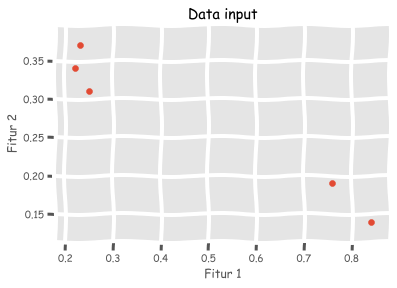

In [5]:
plt.scatter(fitur[:,0], fitur[:,1]);
plt.xlabel('Fitur 1');
plt.ylabel('Fitur 2');
plt.title('Data input');

In [6]:
# set min max for each dimensions
fit1_min, fit1_maks, fit2_min, fit2_maks = 0, 1, 0, 1 

In [7]:
# output hanya berupa single neuron
output = label.shape[1]
output

1

In [8]:
fit1 = [fit1_min, fit1_maks]
fit2 = [fit2_min, fit2_maks]

In [9]:
# lalu kita tinggal buat percp pakai neurolabs pakai single layer perceptron
perseptron = nl.net.newp([fit1,fit2], output)

The goal of learning is reached


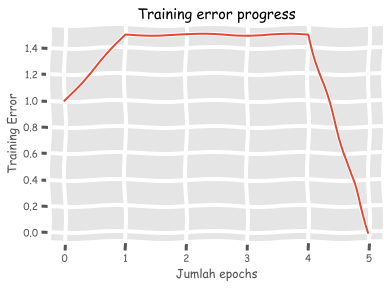

In [10]:
# training
error_progress = perseptron.train(fitur, label, epochs=100, show=20, lr=.03)
# lr = learning rates
# visualisasi proses ini
plt.plot(error_progress);
plt.xlabel('Jumlah epochs');
plt.ylabel('Training Error');
plt.title('Training error progress');
# hanya pakai 5 epochs cepat karena datanya sedikit

In [11]:
# ketika sudah ok, kita akan melakukan prediksi
# 2 dimensi
perseptron.sim([[.81,.23]])
# masuk ke kelas 1 berdasarkan model yang telah kita buat

array([[1.]])

In [12]:
perseptron.sim([[.27,.42]])

array([[0.]])

In [13]:
# kita akan mengabaikan penilaian performance, spt:
# splitting, scaling, cross-validation, dll

# Single layer neural network

* collection od artificial neurons

Sebagai classifier

In [14]:
teks = np.loadtxt('data_nn_sederhana.txt')
teks 

array([[1. , 4. , 0. , 0. ],
       [1.1, 3.9, 0. , 0. ],
       [1.2, 4.1, 0. , 0. ],
       [0.9, 3.7, 0. , 0. ],
       [7. , 4. , 0. , 1. ],
       [7.2, 4.1, 0. , 1. ],
       [6.9, 3.9, 0. , 1. ],
       [7.1, 4.2, 0. , 1. ],
       [4. , 1. , 1. , 0. ],
       [4.1, 0.9, 1. , 0. ],
       [4.2, 1.1, 1. , 0. ],
       [3.9, 0.8, 1. , 0. ],
       [4. , 7. , 1. , 1. ],
       [4.2, 7.2, 1. , 1. ],
       [3.9, 7.1, 1. , 1. ],
       [4.1, 6.8, 1. , 1. ]])

In [15]:
data = teks[:, :2]
data

array([[1. , 4. ],
       [1.1, 3.9],
       [1.2, 4.1],
       [0.9, 3.7],
       [7. , 4. ],
       [7.2, 4.1],
       [6.9, 3.9],
       [7.1, 4.2],
       [4. , 1. ],
       [4.1, 0.9],
       [4.2, 1.1],
       [3.9, 0.8],
       [4. , 7. ],
       [4.2, 7.2],
       [3.9, 7.1],
       [4.1, 6.8]])

In [16]:
label = teks[:,2:]
label

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

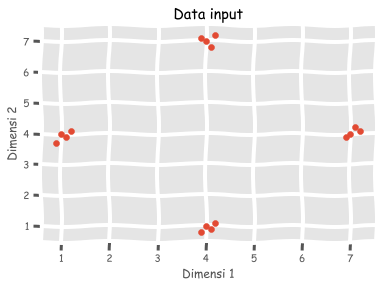

In [17]:
# visualisasi data
plt.scatter(data[:,0], data[:,1]);
plt.xlabel('Dimensi 1');
plt.ylabel('Dimensi 2');
plt.title('Data input');

In [18]:
fit1_min, fit1_maks = data[:,0].min(),data[:,0].max()
fi2_min, fit2_maks = data[:,1].min(), data[:,1].max()
output = label.shape[1]

fit1 = [fit1_min, fit1_maks]
fit2 = [fit2_min, fit2_maks]

snn = nl.net.newp([fit1,fit2], output)

In [19]:
# training 
error_progress = snn.train(data, label, epochs=100, show=20, lr=.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


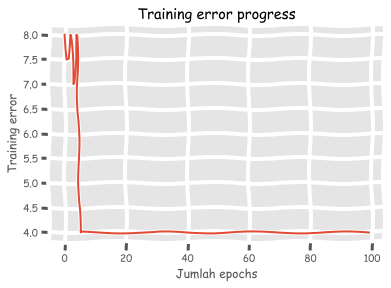

In [20]:
plt.plot(error_progress);
plt.xlabel('Jumlah epochs');
plt.ylabel('Training error');
plt.title("Training error progress");

In [21]:
print('Testing Data:\n')
testing_data = [[0.3, 4.2], [4.3, 0.5], [4.6, 8]]
for i in testing_data:
    print(i, '==>', snn.sim([i])[0])

Testing Data:

[0.3, 4.2] ==> [0. 0.]
[4.3, 0.5] ==> [1. 0.]
[4.6, 8] ==> [1. 1.]


# Multi-layer neural networks

Sebagai regressor

berdasarkan $y = 3x^{2} + 5$

In [22]:
nilai_min = -20
nilai_maks = 20
jumlah_titik = 140

x = np.linspace(nilai_min, nilai_maks, jumlah_titik)
y = 3*np.square(x) + 5

# normalisasi untuk efisiensi
y /= np.linalg.norm(y)

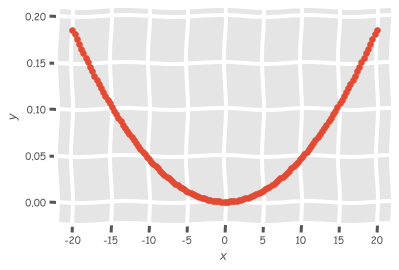

In [23]:
data = x.reshape(jumlah_titik,1)
label = y.reshape(jumlah_titik,1)

plt.scatter(data, label);
plt.xlabel('$x$');
plt.ylabel('$y$');

In [24]:
# 10 neuron di hidden layer 1, 6 neuron di hidden layer 2, 1 neuron output 
mlnn = nl.net.newff([[nilai_min, nilai_maks]], [10,6,1])

# menggunakan gradien descent untuk trainingnya
mlnn.trainf = nl.train.train_gd

error_progress = mlnn.train(data, label, epochs=2000, show=100, goal=0.01)

Epoch: 100; Error: 0.037012959665242456;
Epoch: 200; Error: 0.031137636284758102;
The goal of learning is reached


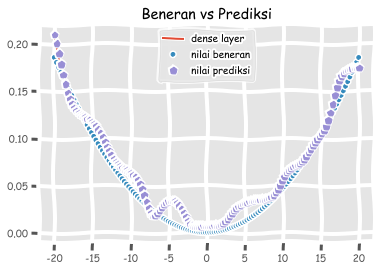

In [25]:
# prediksi pakai datanya sendiri
output = mlnn.sim(data)
y_pred = output.reshape(jumlah_titik)

# dense layer
x_dense = np.linspace(nilai_min, nilai_maks, jumlah_titik*2)
y_dense_pred = mlnn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)

plt.plot(x_dense, y_dense_pred, '-',label ='dense layer');
plt.plot(x, y, '.', label='nilai beneran');
plt.plot(x, y_pred, 'p', label='nilai prediksi');
plt.title('Beneran vs Prediksi');
plt.legend();

dalam project beneran harus ada pre-processing. Ga simpel kaya di sini. Berdasarkan data yg kita punya dipilih lah model nn yang cocok pada training, tweaking parameter cari yang cocok.

# Recurrent Neural Network

Buat data sikuensial. Beda sama data statis. 

* analysis of sequential data (weather, stock, traffic, video feeds).
* suitable for time-series
* require more complex architecture

Kita ga bisa sembarangan tuh pakai model2 ml sederhana atau pakai aristek nn biasa, karena kita berurusan dengan dependensi temporal dari data.

In [34]:
# pendefinisian gelombang sinus
def dapat_data(jum_titik):
    g1 = 0.6 * np.sin(np.arange(0, jum_titik))
    g2 = 3.5 * np.sin(np.arange(0, jum_titik))
    g3 = 1.2 * np.sin(np.arange(0, jum_titik))
    g4 = 4.6 * np.sin(np.arange(0, jum_titik))
    
    a1 = np.ones(jum_titik)
    a2 = 2.2 + np.zeros(jum_titik)
    a3 = 3.1 * np.ones(jum_titik)
    a4 = 0.9 + np.zeros(jum_titik)
    
    gelombang = np.array([g1, g2, g3, g4]).reshape(jum_titik*4,1)
    amplitudo = np.array([a1, a2, a3, a4]).reshape(jum_titik*4,1)
    
    return gelombang, amplitudo

def visualisasi_output(nn, jum_titik_test):
    gelombang, amplitudo = dapat_data(jum_titik_test)
    output = nn.sim(gelombang)
    plt.plot(amplitudo.reshape(jum_titik_test*4));
    plt.plot(output.reshape(jum_titik_test*4));
    
if __name__ == '__main__':
    jum_titik = 100
    gelombang, amplitudo = dapat_data(jum_titik)

In [35]:
# Elman RNN dengan 2 layers
nn = nl.net.newelm([[-2,2]], [10,1], [nl.trans.TanSig(), nl.trans.PureLin()])

min = -2, maks = 2 (input)

jumlah perseptron di dua layers: 10,1

dua fungsi transfer, yakni tangen hiperbolik dan linear

In [36]:
# inisilasi fungsi untuk setiap layer
nn.layers[0].initf = nl.init.InitRand([-.1, .1], 'wb')
nn.layers[1].initf = nl.init.InitRand([-.1, .1], 'wb')

# actually initialize the net
nn.init()

Epoch: 100; Error: 0.753416160080037;
Epoch: 200; Error: 0.6402974775667982;
Epoch: 300; Error: 1.4170120095369134;
Epoch: 400; Error: 0.7525851203666295;
Epoch: 500; Error: 0.7072077181790547;
Epoch: 600; Error: 0.8088897226341689;
Epoch: 700; Error: 0.19660730406712873;
Epoch: 800; Error: 0.15029952439070876;
Epoch: 900; Error: 0.15011006278205813;
Epoch: 1000; Error: 0.15744871928377774;
Epoch: 1100; Error: 0.2629748038031307;
Epoch: 1200; Error: 0.18592358079786261;
Epoch: 1300; Error: 0.1513910234123015;
Epoch: 1400; Error: 0.14909666861576798;
Epoch: 1500; Error: 0.2408295065674025;
Epoch: 1600; Error: 0.21325126649371068;
Epoch: 1700; Error: 0.18402885647493109;
Epoch: 1800; Error: 0.2724264768624722;
Epoch: 1900; Error: 0.15778995524596467;
Epoch: 2000; Error: 0.39929868860170026;
The maximum number of train epochs is reached


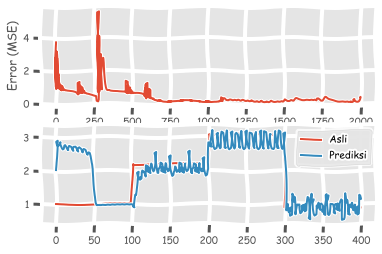

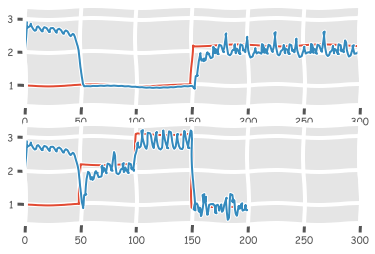

In [37]:
error_progress = nn.train(gelombang, amplitudo, epochs=2000, show=100, goal=.01)

output = nn.sim(gelombang)

plt.subplot(211);
plt.plot(error_progress);
plt.xlabel('Jumlah Epochs');
plt.ylabel('Error (MSE)');

plt.subplot(212)
plt.plot(amplitudo.reshape(jum_titik*4))
plt.plot(output.reshape(jum_titik*4))
plt.legend(['Asli', 'Prediksi'])

plt.figure();
plt.subplot(211);
visualisasi_output(nn, 150); # untuk bilangan acak di atas jumlah training
plt.xlim([0, 300]);

plt.subplot(212);
visualisasi_output(nn, 50); # untuk bilangan acak di bawah jumlah training
plt.xlim([0, 300]);